In [1]:
import os, glob, shutil
import modified_functions as modif
import matplotlib.pyplot as plt
from blimpy import Waterfall
import blimpy
from pathlib import Path
from turbo_seti.find_doppler.find_doppler import FindDoppler

#removes anything left from the tempImages file from a previous run
shutil.rmtree("tempImages")
os.mkdir("tempImages")

files = sorted(glob.glob(os.path.join("data", '*.fil')))

print(files)

['data/spliced_blc0001020304050607_guppi_58100_78802_OUMUAMUA_0011.gpuspec.0002.fil', 'data/spliced_blc0001020304050607_guppi_58100_79116_OUMUAMUA_OFF_0012.gpuspec.0002.fil', 'data/spliced_blc0001020304050607_guppi_58100_79430_OUMUAMUA_0013.gpuspec.0002.fil', 'data/spliced_blc0001020304050607_guppi_58100_79744_OUMUAMUA_OFF_0014.gpuspec.0002.fil', 'data/spliced_blc0001020304050607_guppi_58100_80058_OUMUAMUA_0015.gpuspec.0002.fil', 'data/spliced_blc0001020304050607_guppi_58100_80372_OUMUAMUA_OFF_0016.gpuspec.0002.fil']


In [2]:
cur_name = "" #current name of the observation.
num_of_observations = 1
i = 0
print('Please wait until all final images are created.')
for file in files:
    fil = Waterfall(file,max_load = 5,f_start=1000)
    modif.waterfall_png(fil)
    
print("Completed creating images.")

Please wait until all final images are created.
blimpy.io.base_reader WARNING  Setting f_start = 1651.463413, since f_start not given or not valid.
blimpy.io.base_reader WARNING  f_start=1000, f_stop=3151.4634132385254, t_start=0, t_stop=279, init=True


TypeError: waterfall_png() missing 1 required positional argument: 'name'

blimpy.io.base_reader WARNING  Setting f_stop = 3151.463413, since f_stop not given or not valid.
blimpy.io.base_reader WARNING  f_start=2000, f_stop=4000, t_start=0, t_stop=279, init=True
3151.4634132385254
1651.4662742614746
3151.4634132385254
1651.4662742614746
blimpy.io.base_reader WARNING  Setting f_stop = 3151.463413, since f_stop not given or not valid.
blimpy.io.base_reader WARNING  f_start=2000, f_stop=4000, t_start=0, t_stop=279, init=True
3151.4634132385254
1651.4662742614746
3151.4634132385254
1651.4662742614746
blimpy.io.base_reader WARNING  Setting f_stop = 3151.463413, since f_stop not given or not valid.
blimpy.io.base_reader WARNING  f_start=2000, f_stop=4000, t_start=0, t_stop=279, init=True
3151.4634132385254
1651.4662742614746
3151.4634132385254
1651.4662742614746
blimpy.io.base_reader WARNING  Setting f_stop = 3151.463413, since f_stop not given or not valid.
blimpy.io.base_reader WARNING  f_start=2000, f_stop=4000, t_start=0, t_stop=279, init=True
3151.46341323852

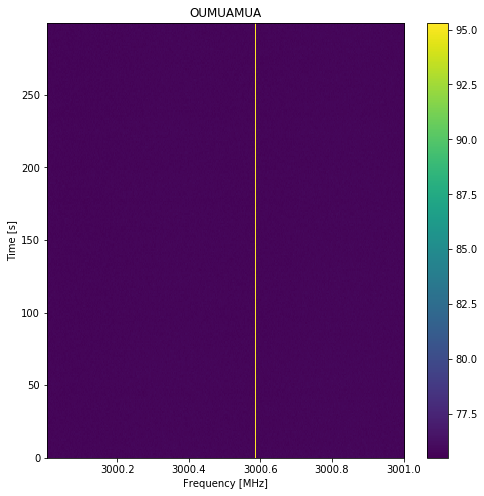

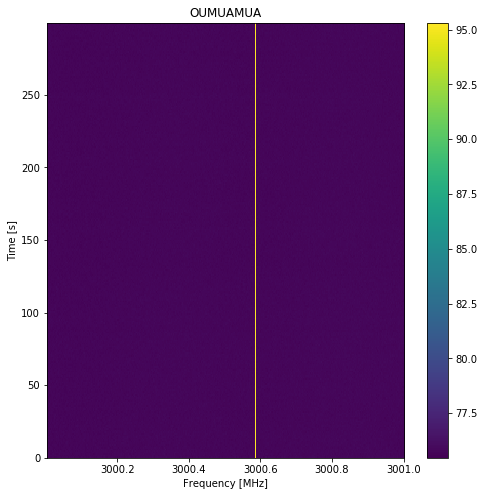

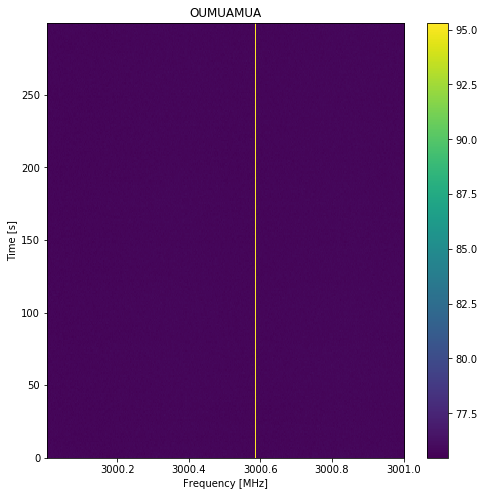

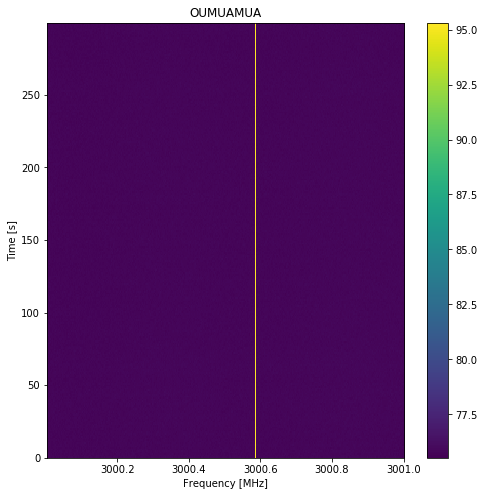

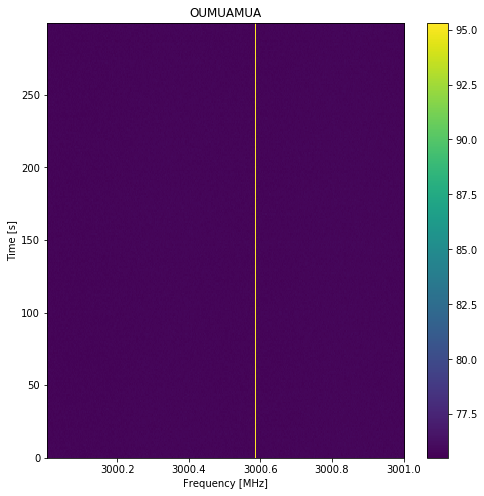

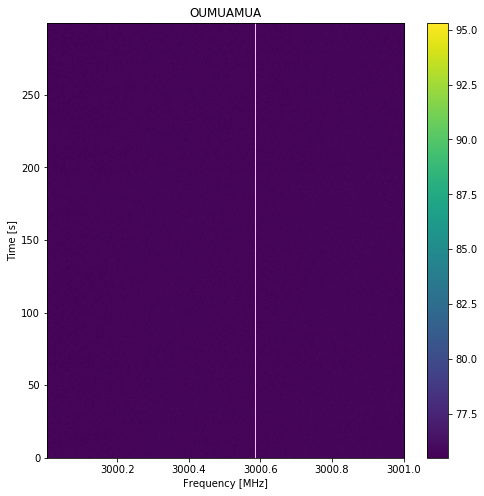

In [14]:
%matplotlib inline
for file in files:
    fil = Waterfall(file,max_load=blimpy.calcload.calc_max_load(file),f_start = 2000,f_stop = 4000)
    freqs= fil.get_freqs()
    print(freqs[0])
    print(freqs[-1])
    fil = Waterfall(file,max_load=blimpy.calcload.calc_max_load(file),f_start = 3000,f_stop = 3001)
    freqs= fil.get_freqs()
    print(freqs[0])
    print(freqs[-1])
    plt.figure(figsize=(8,8))
    fil.plot_waterfall()
    #modif.waterfall_png(fil,"images/" + fil.header["source_name"])

In [5]:
fil.info()


--- File Info ---
      machine_id :                               20
    telescope_id :                                6
       data_type :                                1
            fch1 :           3151.4634132385254 MHz
            foff :         -0.00286102294921875 MHz
          nchans :                           524288
     source_name :                         OUMUAMUA
         src_raj :                      23:21:03.84
         src_dej :                       7:36:30.24
        az_start :                              0.0
        za_start :                              0.0
           nbits :                               32
   tstart (ISOT) :          2017-12-13T22:19:32.000
    tstart (MJD) :               58100.930231481485
           tsamp :               1.0737418239999998
            nifs :                                1

Num ints in file :                              279
      File shape :                 (279, 1, 524288)
--- Selection Info ---
Data selection shape 

In [2]:
observation = 0
print('Please wait until all final images are created.')
for file in files:
    fil = Waterfall(file,max_load = 5)
    name = fil.header["source_name"]
    splice = 0
    freqs = fil.get_freqs()
    maxFreq = float(freqs[0])
    minFreq = float(freqs[-1])
    curFreq = minFreq
    while curFreq <= maxFreq-100:
        print("Creating temp image for observation " + str(observation) +
              " of target " + name + ". Splice " + str(splice))
        modif.waterfall_png(fil, "tempImages/" + name + str(observation) + "_" + str(splice),
                            f_start = curFreq ,f_stop = curFreq+100)
        curFreq+=100
        splice+=1
    print("Creating temp image for observation " + str(observation) +
              " of target " + name + ". Splice " + str(splice))
    modif.waterfall_png(fil, "tempImages/" + name + str(observation) + "_" + str(splice),
                            f_start = maxFreq-(maxFreq-curFreq) ,f_stop = maxFreq)   
    observation+=1
print("\n-----------------------------")
print("Completed temporary images.")
print("-----------------------------\n")
for i in range(0,splice+1):
    print("Creating final image for splice " + str(i) +
              " of target " + name)
    modif.combine_pngs(name,i)
print("Completed creating images.")

Please wait until all final images are created.
Creating temp image for observation 0 of target OUMUAMUA. Splice 0
Creating temp image for observation 0 of target OUMUAMUA. Splice 1
Creating temp image for observation 0 of target OUMUAMUA. Splice 2
Creating temp image for observation 0 of target OUMUAMUA. Splice 3
Creating temp image for observation 0 of target OUMUAMUA. Splice 4
Creating temp image for observation 0 of target OUMUAMUA. Splice 5
Creating temp image for observation 0 of target OUMUAMUA. Splice 6
Creating temp image for observation 0 of target OUMUAMUA. Splice 7
Creating temp image for observation 0 of target OUMUAMUA. Splice 8
Creating temp image for observation 0 of target OUMUAMUA. Splice 9
Creating temp image for observation 0 of target OUMUAMUA. Splice 10
Creating temp image for observation 0 of target OUMUAMUA. Splice 11
Creating temp image for observation 0 of target OUMUAMUA. Splice 12
Creating temp image for observation 0 of target OUMUAMUA. Splice 13
Creating t